In [20]:
# Importação das bibliotecas necessárias
import numpy as np
import argparse
from matplotlib import pyplot as plt
import cv2

In [21]:
# Variáveis
prototxt = 'deploy.prototxt.txt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
image = 'peoples.jpeg'
confidence_custom = 0.5

In [22]:
# Carrega o modelo treinado
net = cv2.dnn.readNetFromCaffe(prototxt, model)

In [23]:
# Carrega a imagem de input e converte em formato blob
# Redimensiona e depois normaliza
image = cv2.imread(image)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, 
    (300, 300), (104.0, 177.0, 123.0))

In [29]:
# Envia o blob da image para a rede para ter acesso as predições e detecções
net.setInput(blob)
detections = net.forward()

In [30]:
# Controla o número de faces detectadas
num_faces = 0

# Itera o número de faces encontradas
for i in range(0, detections.shape[2]):
    
    # Nível de confiança para a detecção atual
    confidence = detections[0, 0, i, 2]
 
    # Filtra somente as detecções que tem uma confiança maior que a definida anteriomente
    if confidence > confidence_custom:
        
        # Incrementa o número de faces detectadas
        num_faces += 1
        
        # calcula as coordenadas X e Y para desenhar o "box" sobre a face detectada
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # Desenha o "box" sobre a face e também exibe o percentual de confiança sobre a detecção
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), 
            (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [31]:
# Exibe o resultado em uma nova janela
# cv2.imshow("Output", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

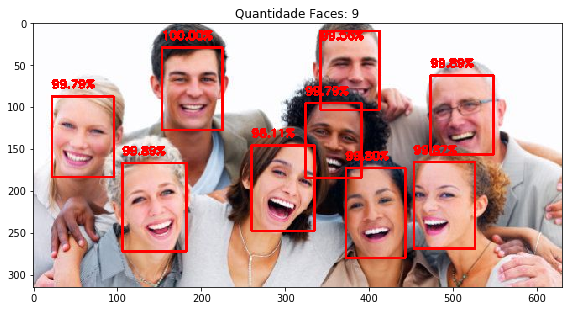

In [32]:
# Exibe o resultado da detecção
plt.figure(figsize=(8,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Quantidade Faces: {}".format(num_faces))
plt.tight_layout()
plt.show()